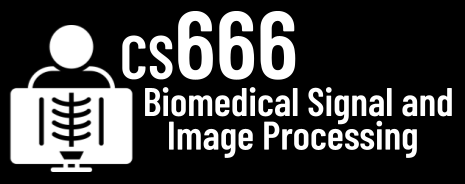
#Assignment 5

In [2]:
# NAME:Lakshmi Keerthana Aravapalli

In [3]:
# In this assignment, we will visualize and explore a CT scan!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [6]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [7]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-15 20:58:02--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2024-04-15 20:58:02 (68.2 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [8]:
# Then use the following snippet to extract the data.

In [9]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [10]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [11]:
# TODO: 220

In [12]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [13]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

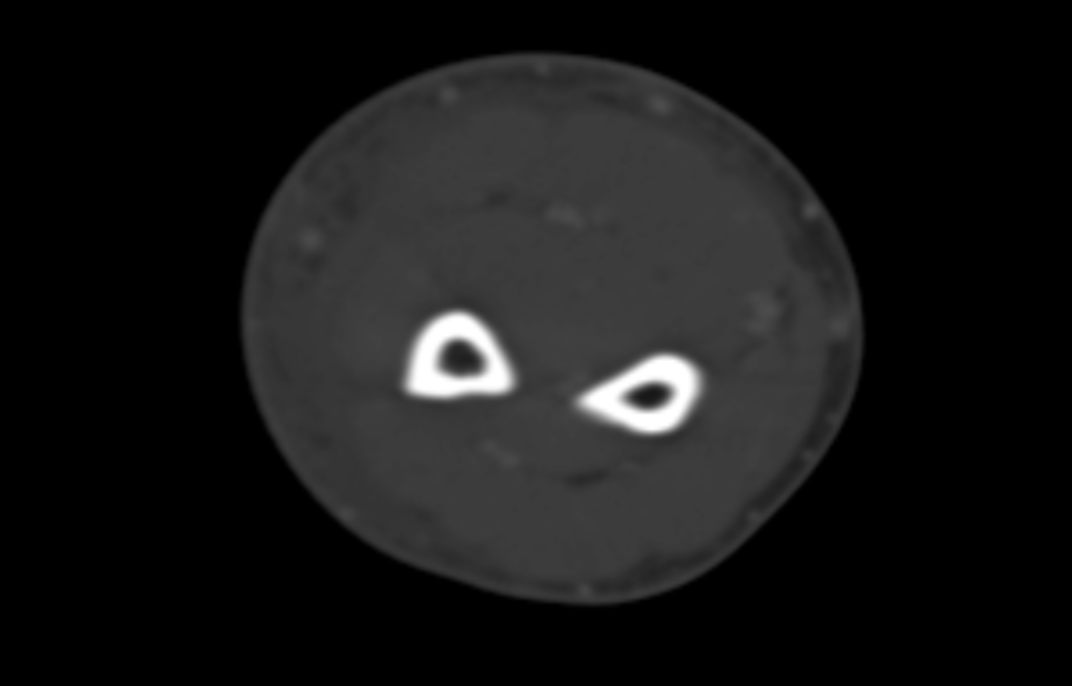

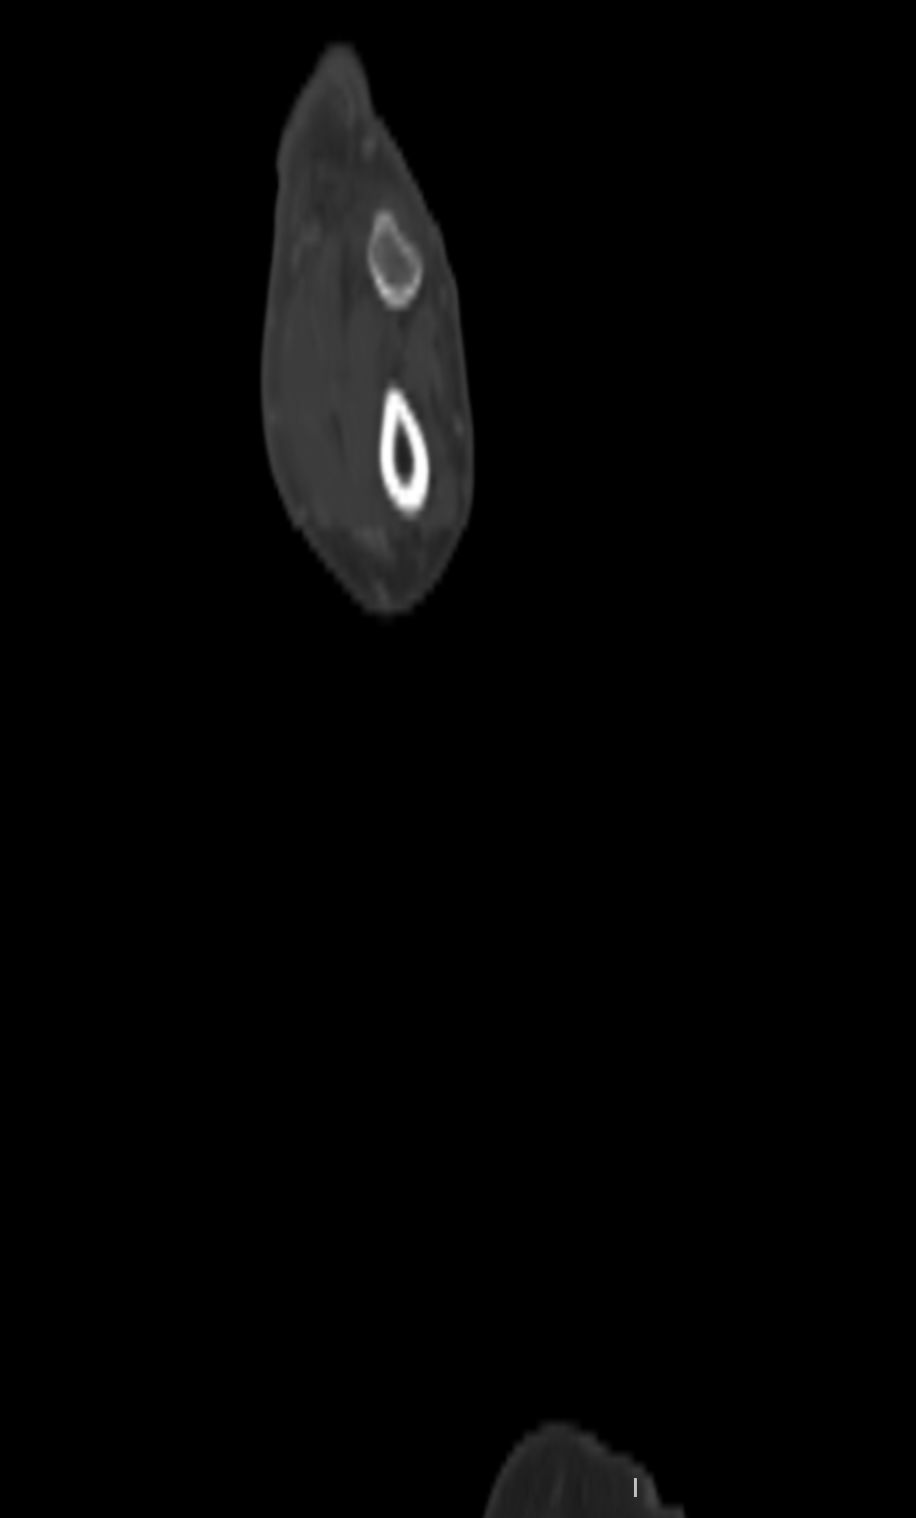

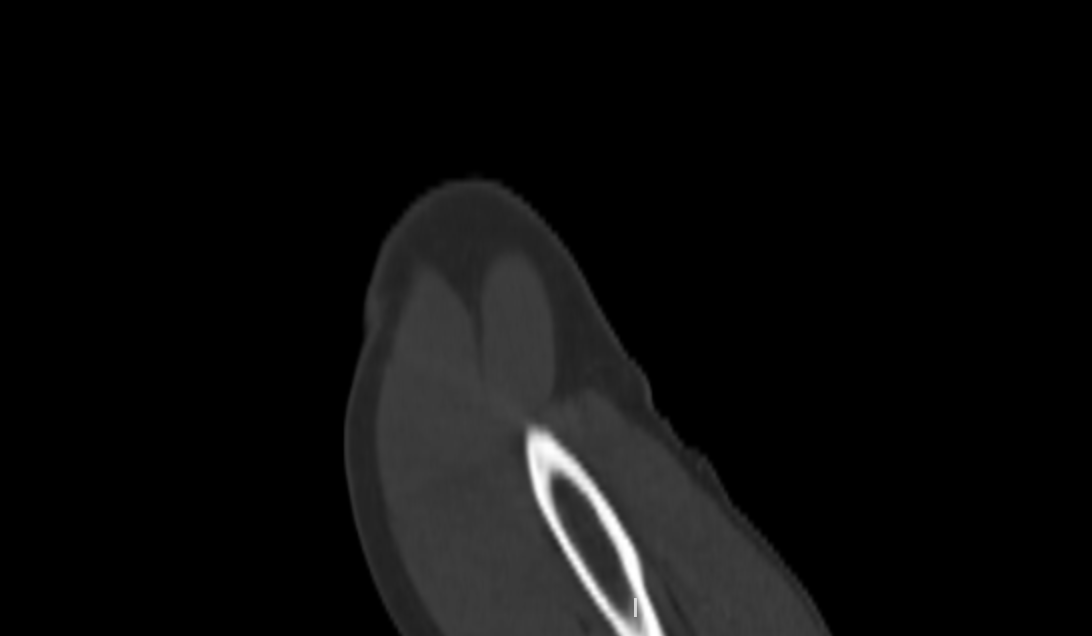

In [14]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [15]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

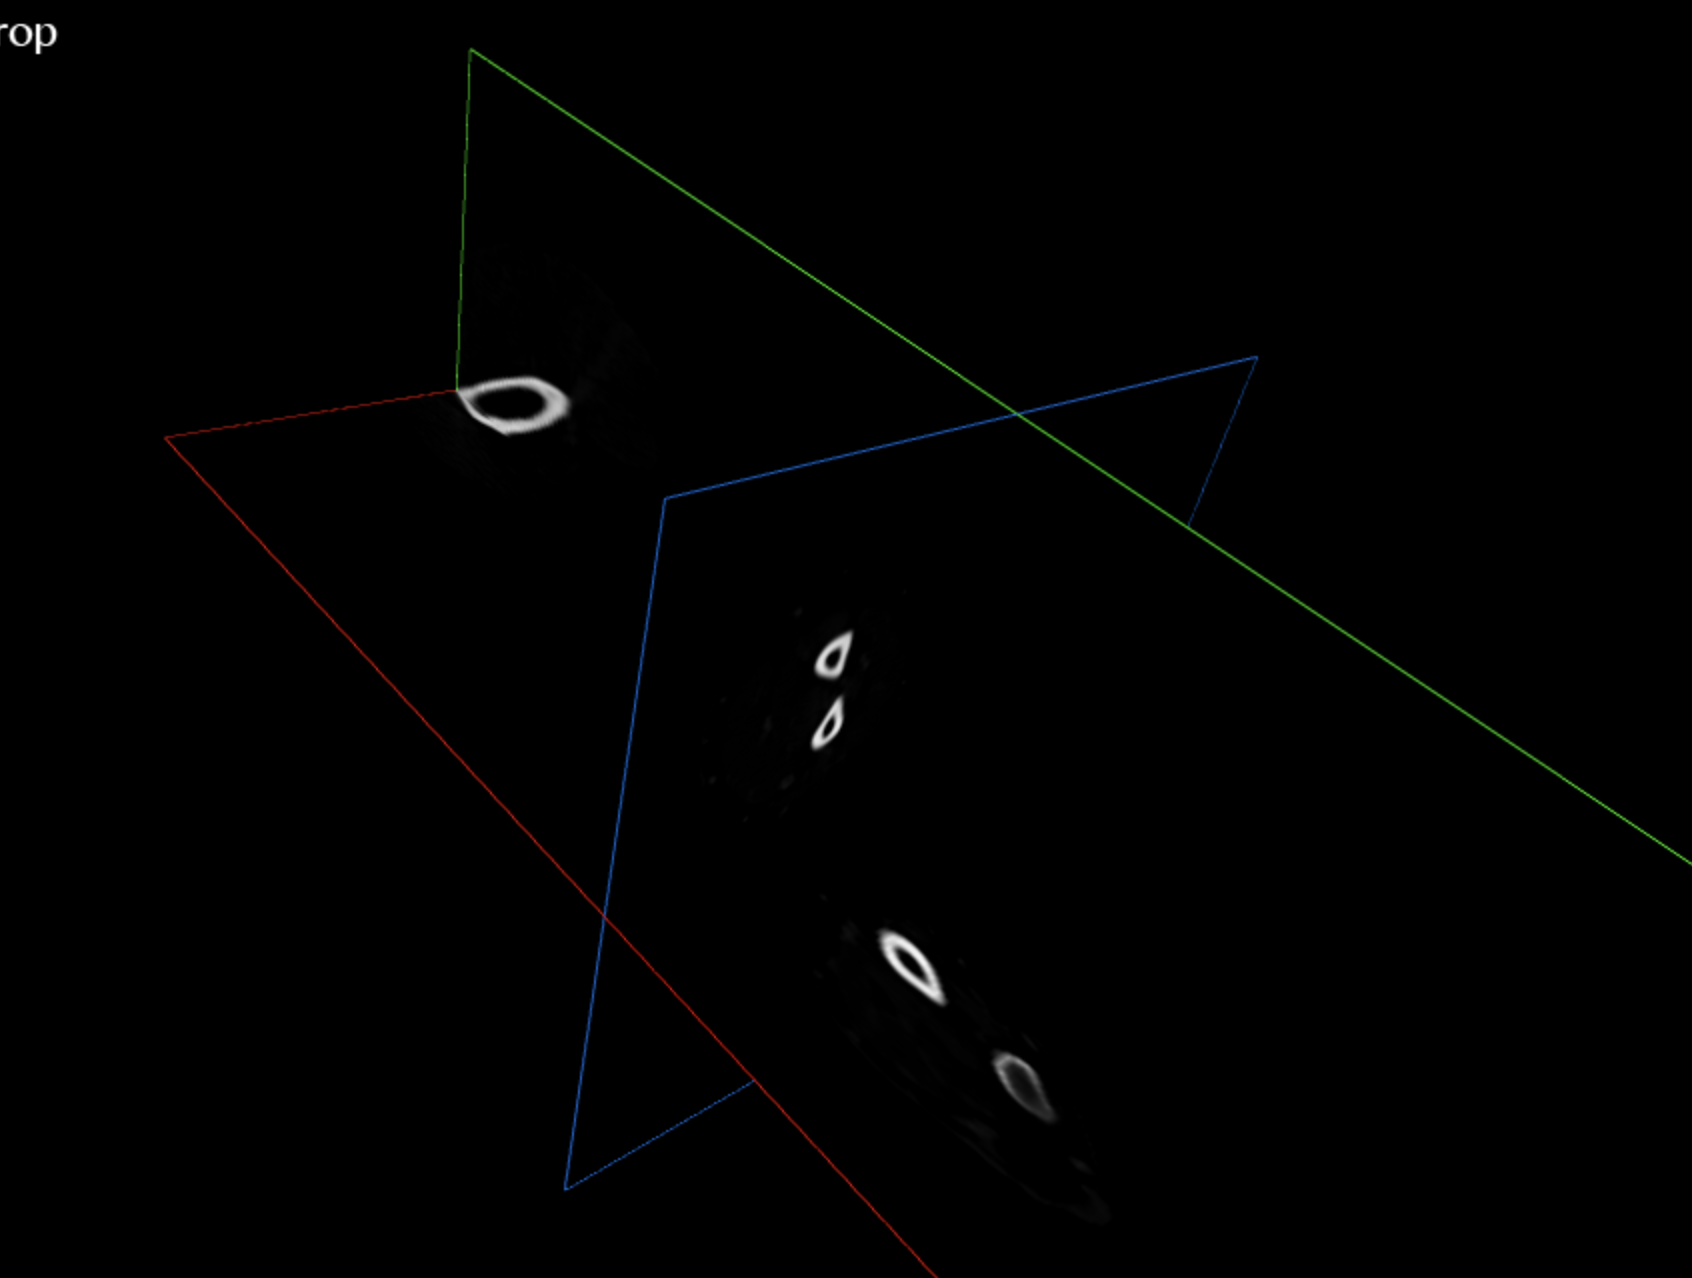

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [16]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [17]:
from pydicom import dcmread
import os
import pydicom

In [18]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
directory="/content/ct"
files = [os.path.join(directory, file) for file in os.listdir(directory)]
files.sort()
print(files[0:5])

['/content/ct/IM-0001-0001.dcm', '/content/ct/IM-0001-0002.dcm', '/content/ct/IM-0001-0003.dcm', '/content/ct/IM-0001-0004.dcm', '/content/ct/IM-0001-0005.dcm']


In [19]:
num_slices = len(files)

In [20]:
first_file = pydicom.dcmread(files[0])
rows = int(first_file.Rows)
cols = int(first_file.Columns)
print("rows:"+str(rows)+", columns:"+str(cols))

rows:454, columns:512


In [21]:
slices_array = np.zeros((rows, cols, num_slices), dtype=np.uint16)

for idx, file in enumerate(files):
  dicom_data = pydicom.dcmread(file)
  slices_array[:, :, idx] = dicom_data.pixel_array


In [22]:
print(slices_array.shape)

(454, 512, 220)


In [23]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

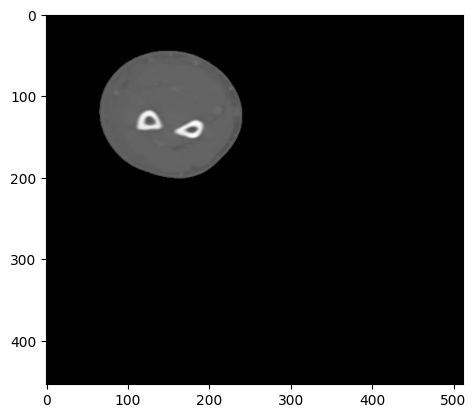

In [24]:
# TODO: YOUR CODE FOR AXIAL
axial_slice = slices_array[:, :, slices_array.shape[2] // 2]
plt.imshow(axial_slice, cmap='gray')

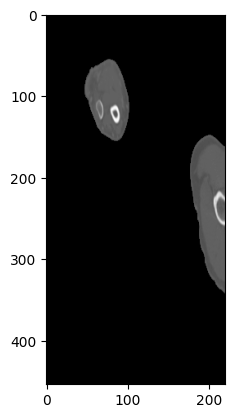

In [25]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_slice = slices_array[:, slices_array.shape[1] // 2, :]
plt.imshow(sagittal_slice, cmap='gray')

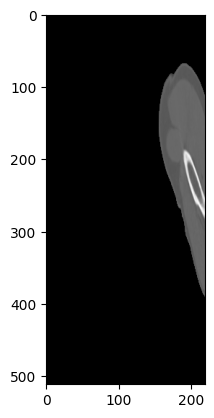

In [26]:
# TODO: YOUR CODE FOR CORONAL
coronal_slice = slices_array[slices_array.shape[0] // 2, :, :]
plt.imshow(coronal_slice, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [27]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [28]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [29]:
# TODO: YOUR CODE
dicom_file = '/content/ct/IM-0001-0001.dcm'
dicom_data = pydicom.dcmread(dicom_file)

if 'WindowCenter' in dicom_data and 'WindowWidth' in dicom_data:
  window_center = dicom_data['WindowCenter'].value
  window_width = dicom_data['WindowWidth'].value
  rescale_intercept = dicom_data.get('RescaleIntercept', 0)
else:
  raise ValueError("Window Center and Window Width tags not found in DICOM file.")


window_level_data =window_center, window_width, rescale_intercept
print(window_level_data)

('30.0', '410.0', '-1024.0')


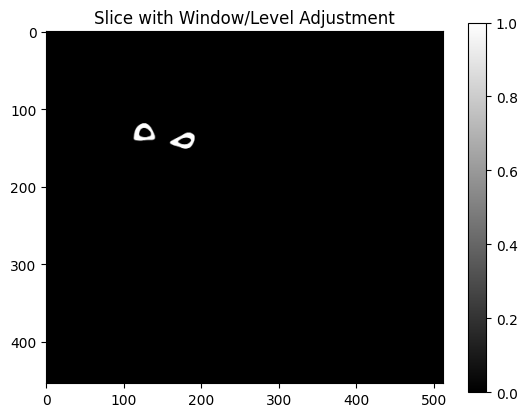

In [30]:
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2
adjusted_slice = axial_slice * dicom_data.RescaleSlope + rescale_intercept
adjusted_slice = adjusted_slice + rescale_intercept  # Apply rescale intercept
adjusted_slice = (adjusted_slice - vmin) / (vmax - vmin)
adjusted_slice = adjusted_slice.clip(0, 1)

plt.imshow(adjusted_slice, cmap='gray', vmin=0, vmax=1)  # vmin and vmax are set to 0 and 1 for normalized data
plt.title('Slice with Window/Level Adjustment')
plt.colorbar()
plt.show()

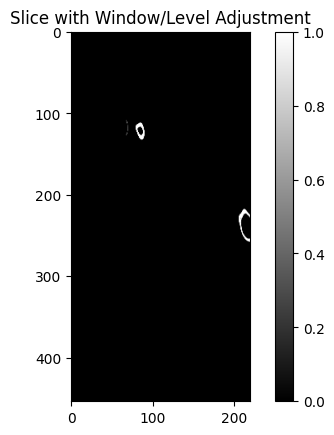

In [31]:
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2
adjusted_slice = sagittal_slice * dicom_data.RescaleSlope + rescale_intercept
adjusted_slice = adjusted_slice + rescale_intercept  # Apply rescale intercept
adjusted_slice = (adjusted_slice - vmin) / (vmax - vmin)
adjusted_slice = adjusted_slice.clip(0, 1)

plt.imshow(adjusted_slice, cmap='gray', vmin=0, vmax=1)  # vmin and vmax are set to 0 and 1 for normalized data
plt.title('Slice with Window/Level Adjustment')
plt.colorbar()
plt.show()

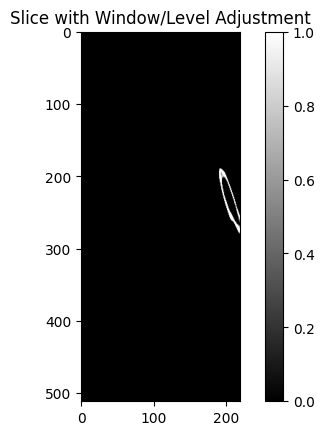

In [32]:
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2
adjusted_slice = coronal_slice * dicom_data.RescaleSlope + rescale_intercept
adjusted_slice = adjusted_slice + rescale_intercept  # Apply rescale intercept
adjusted_slice = (adjusted_slice - vmin) / (vmax - vmin)
adjusted_slice = adjusted_slice.clip(0, 1)

plt.imshow(adjusted_slice, cmap='gray', vmin=0, vmax=1)  # vmin and vmax are set to 0 and 1 for normalized data
plt.title('Slice with Window/Level Adjustment')
plt.colorbar()

In [33]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

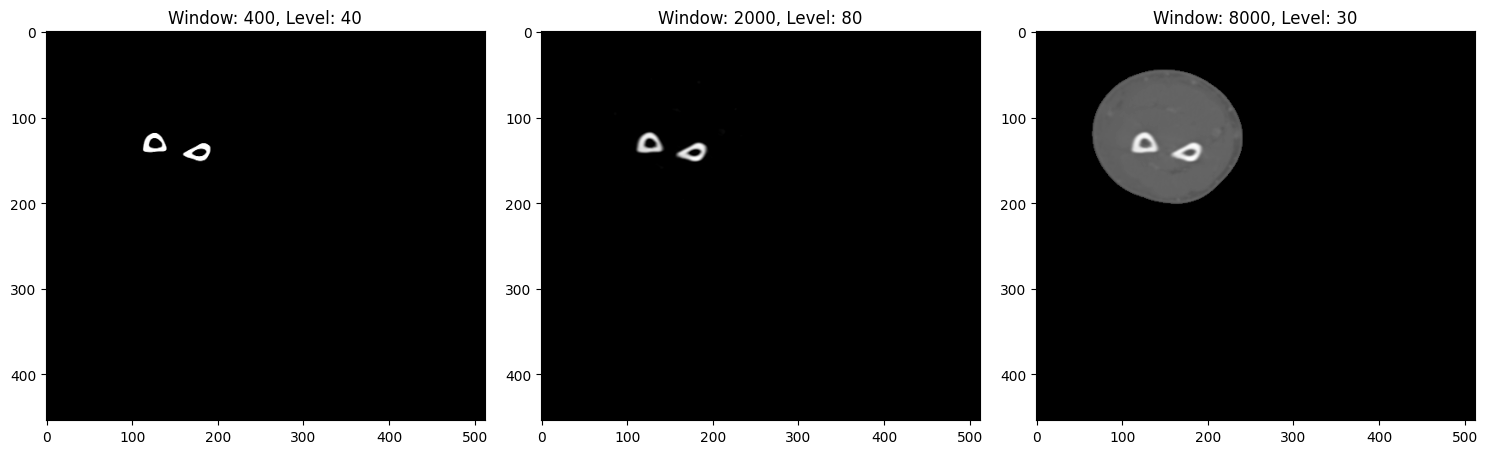

In [53]:
window_levels = [
    (40, 400),
    (80, 2000),
    (30,8000)
]

fig, axs = plt.subplots(1, len(window_levels), figsize=(15, 5))

for idx, (window_center, window_width) in enumerate(window_levels, start=0):
  vmin = window_center - window_width / 2
  vmax = window_center + window_width / 2
  adjusted_slice = axial_slice * dicom_data.RescaleSlope + rescale_intercept
  adjusted_slice = adjusted_slice + rescale_intercept
  adjusted_slice = (adjusted_slice - vmin) / (vmax - vmin)
  adjusted_slice = adjusted_slice.clip(0, 1)
  axs[idx].imshow(adjusted_slice, cmap='gray')
  axs[idx].set_title(f'Window: {window_width}, Level: {window_center}')

plt.tight_layout()
plt.show()

In [35]:
# Which values make sense and why?

In [36]:
# TODO: YOUR ANSWER

In [36]:
#The values 400 and 40 shows the bone part perfectly. if the values are increased, it is getting blur and other tissues are also getting displayed.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [37]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [38]:
image_volume=slices_array
print(image_volume.shape)

(454, 512, 220)


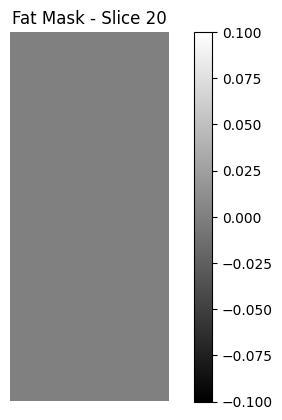

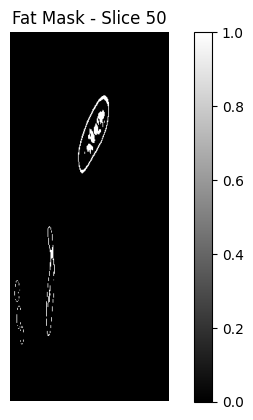

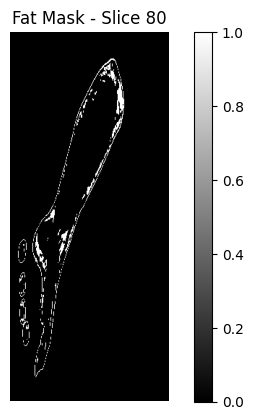

In [82]:
# TODO: YOUR CODE TO SEGMENT FAT

fat_threshold = (20, 1000)

fat_mask = image_volume.copy()
fat_mask[(fat_mask < fat_threshold[0]) | (fat_mask > fat_threshold[1])] = 0
fat_mask = np.clip(fat_mask, 0, 1)


slices_to_visualize = [20, 50, 80]  # Change these to slice indices you want to visualize

for slice_idx in slices_to_visualize:
    plt.imshow(fat_mask[slice_idx, :, :], cmap='gray')
    plt.title(f'Fat Mask - Slice {slice_idx}')
    plt.colorbar()
    plt.axis('off')
    plt.show()

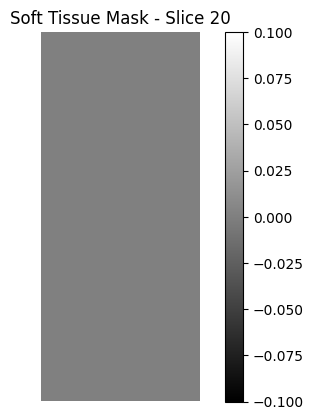

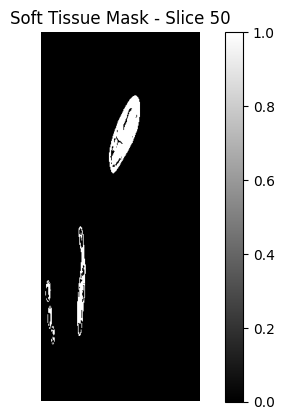

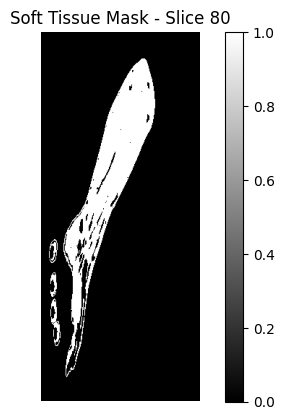

In [81]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE


soft_tissue_threshold = (50, 1100)

soft_tissue_mask = image_volume.copy()
soft_tissue_mask[(soft_tissue_mask < soft_tissue_threshold[0]) | (soft_tissue_mask > soft_tissue_threshold[1])] = 0
soft_tissue_mask = np.clip(soft_tissue_mask, 0, 1)


slices_to_visualize = [20, 50, 80]  # Change these to slice indices you want to visualize

for slice_idx in slices_to_visualize:
    plt.imshow(soft_tissue_mask[slice_idx, :, :], cmap='gray')
    plt.title(f'Soft Tissue Mask - Slice {slice_idx}')
    plt.colorbar()
    plt.axis('off')
    plt.show()


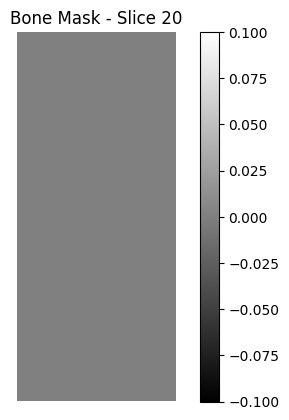

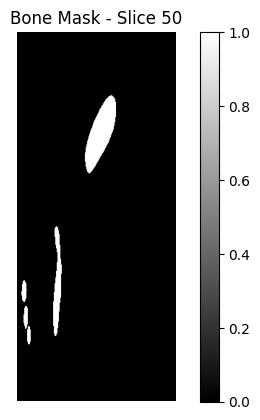

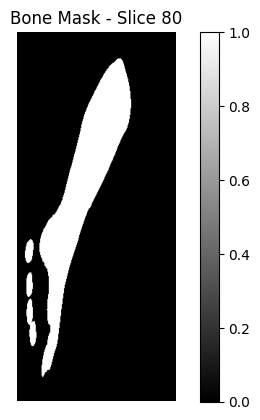

In [76]:
# TODO: YOUR CODE TO SEGMENT BONES

bone_threshold = (40, 4000)

bone_mask= image_volume.copy()
bone_mask[(bone_mask < bone_threshold[0]) | (bone_mask > bone_threshold[1])] = 0
bone_mask = np.clip(bone_mask, 0, 1)


slices_to_visualize = [20, 50, 80]  # Change these to slice indices you want to visualize

for slice_idx in slices_to_visualize:
    plt.imshow(bone_mask[slice_idx, :, :], cmap='gray')
    plt.title(f'Bone Mask - Slice {slice_idx}')
    plt.colorbar()
    plt.axis('off')
    plt.show()



In [42]:
# Are the segmentations good?

In [43]:
# TODO: Only bone is being segmented properly.

In [44]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""